# Simple Linear regression Model

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Surname']=encoder.fit_transform(df['Surname'])
df['Geography']=encoder.fit_transform(df['Geography'])
df['Gender']=encoder.fit_transform(df['Gender'])

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

In [56]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [57]:
print(f'X shape = {X.shape}')
print(f'y shape = {y.shape}')

X shape = (165034, 13)
y shape = (165034, 1)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [97]:
# param_grid = {
#     'n_estimators': [200],
#     'max_depth': [10],
#     'min_samples_split': [2],
#     'min_samples_leaf': [2]
# }

model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2)

In [98]:
model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [103]:
# Step 7: Use the best model for predictions
binary_predictions = model.predict(X_test)
probability_predictions = model.predict_proba(X_test)[:, 1]

In [104]:
print(probability_predictions)
print(binary_predictions)

[0.18211148 0.03145973 0.74589229 ... 0.3929982  0.02025106 0.1016875 ]
[0 0 1 ... 0 0 0]


In [106]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [107]:
# evaluate the model
ascore = accuracy_score(y_test, binary_predictions)
roc_auc = roc_auc_score(y_test, probability_predictions)

# Print the evaluation metrics
print(f'Accuracy: {ascore}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.8637561729330142
ROC-AUC Score: 0.8879923998709434


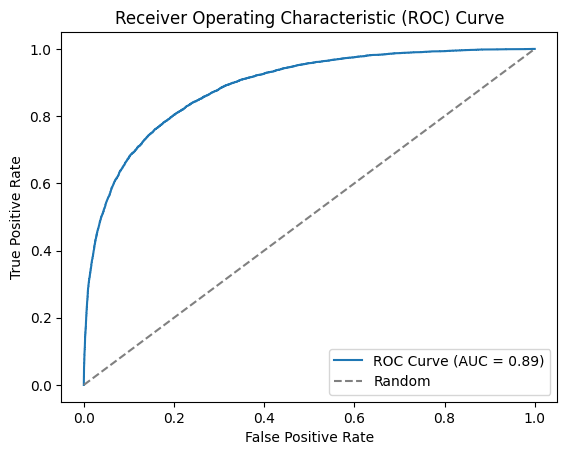

In [110]:
#Plot ROC-AUC graph

fpr, tpr, thresholds = roc_curve(y_test, probability_predictions)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [111]:
import joblib
joblib.dump(model, 'model5.pkl')

['model5.pkl']